## Task 4
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('twitter_training.csv')

In [3]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
data.columns=['Tweet ID','Companies','labels','Text']

In [5]:
data

,Tweet ID,Companies,labels,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
data.head()

,Tweet ID,Companies,labels,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
data.tail()

,Tweet ID,Companies,labels,Text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   74681 non-null  int64 
 1   Companies  74681 non-null  object
 2   labels     74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data.shape

(74681, 4)

In [10]:
def analyze_sentiment(text, threshold=0.1):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    
    if polarity > threshold:
        return 'positive'
    elif polarity < -threshold:
        return 'negative'
    elif abs(polarity) == threshold:
        return 'neutral'
    else:
        return 'irrelevant'

In [11]:
# Apply sentiment analysis to the text column
data['sentiment_score'] = data['Text'].apply(analyze_sentiment)

In [12]:
data

,Tweet ID,Companies,labels,Text,sentiment_score
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,irrelevant
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,irrelevant
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,irrelevant
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,irrelevant
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,irrelevant
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,negative
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,negative
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,negative
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,irrelevant


In [13]:
data.isnull().sum()

Tweet ID             0
Companies            0
labels               0
Text               686
sentiment_score      0
dtype: int64

In [14]:
data['sentiment_score'].value_counts()

sentiment_score
positive      28703
irrelevant    27590
negative      16648
neutral        1740
Name: count, dtype: int64

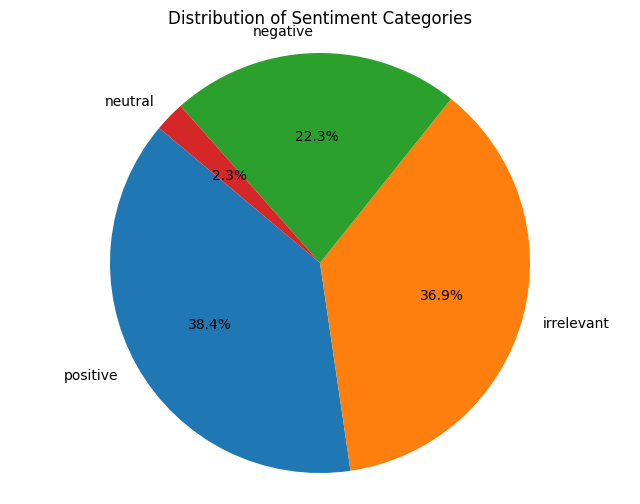

In [15]:
sentiment_counts = data['sentiment_score'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [16]:
true_labels=data['labels']
predicted_labels=data['sentiment_score']
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")


Accuracy: 0.0


In [17]:
X = data['Text']
y = data['labels']

In [18]:
# Preprocess data (if necessary)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Remove rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update y_train accordingly

In [19]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Update y_test accordingly

# Vectorize features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict on test data
y_pred = clf.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2629
    Negative       0.92      0.94      0.93      4430
     Neutral       0.92      0.92      0.92      3507
    Positive       0.90      0.94      0.92      4220

    accuracy                           0.92     14786
   macro avg       0.93      0.91      0.92     14786
weighted avg       0.92      0.92      0.92     14786



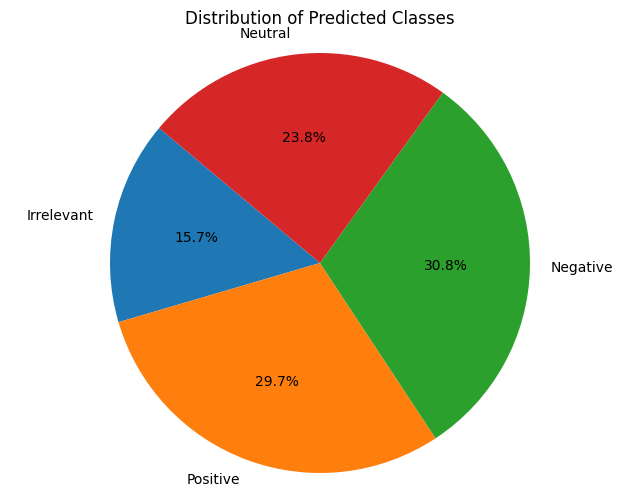

In [22]:
class_counts = {}
for label in y_pred:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Extract labels and counts for the pie chart
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()